In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import tensorflow as tf
import cv2
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
sys.path.append('../')
tf.random.set_seed(42)

from helpers import *
from glash_v2 import glash_discriminator, glash_generator, Glash

2022-01-27 20:44:05.299631: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
mean = (1, 1)
cov = [[1, 0], [0, 1]] # Should be symmetric
x = np.random.multivariate_normal(mean, cov, 4000).astype('float32')

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  3.,
          2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  4.,  1.,  2.,  1.,  2.,
          4.,  3.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  0.,  2.,  2.,  3.,  4.,  5., 10.,  4.,
          4.,  6.,  3.,  5.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2.,  1.,  5.,  7.,  5., 10.,  9.,  7.,
          6.,  8.,  6.,  3.,  3.,  4.,  3.,  0.,  1.,  0.,  0.

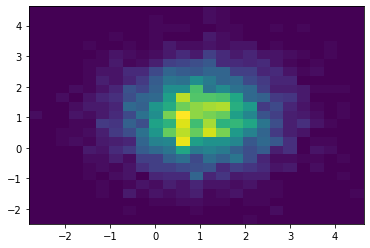

In [3]:
plt.hist2d(x[:, :1].reshape(4000,), x[:, 1:2].reshape(4000,), bins=25)

In [4]:
train_data = tf.data.Dataset.from_tensor_slices(x)
train_data = train_data.batch(64).prefetch(32)

2022-01-27 20:44:06.644328: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-27 20:44:06.645163: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-27 20:44:06.695923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 20:44:06.696313: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-01-27 20:44:06.696338: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-27 20:44:06.697649: I tensorflow/stream_executor/platform/defa

In [5]:
glash = Glash(glash_discriminator(), glash_generator())
glash.compile(
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adam(),
    tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [6]:
generated_point_list = []

cbk = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: show_samples(generated_point_list, epoch, glash.generator, x))

history = glash.fit(train_data, epochs=3000, callbacks=[cbk], verbose=False)

2022-01-27 20:44:08.023011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-27 20:44:08.050254: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2022-01-27 20:44:08.168065: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


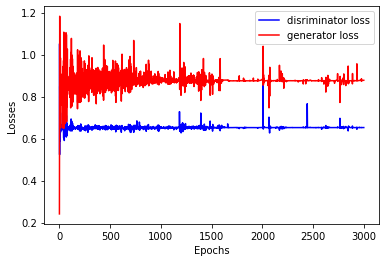

In [7]:
plt.plot(history.history['d_loss'], color='blue', label='disriminator loss')
plt.plot(history.history['g_loss'], color='red', label='generator loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

In [8]:
noise = toy_data(4000, 0, 1).astype('float32')
noise.shape

(4000, 2)

In [9]:
np.random.uniform(0,1,(4000,5))

array([[0.24792168, 0.65216347, 0.91302128, 0.02204322, 0.31836744],
       [0.13994679, 0.13961498, 0.77236194, 0.77155935, 0.42779525],
       [0.14597931, 0.85613298, 0.28877497, 0.52070773, 0.96105949],
       ...,
       [0.45642164, 0.96363273, 0.04740134, 0.35940573, 0.42070685],
       [0.67671165, 0.08201278, 0.25034506, 0.46348798, 0.66988195],
       [0.16548627, 0.44496966, 0.58386043, 0.82614653, 0.46016363]])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  2.,  5.,  2.,  2.,
          3.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  1.,  0.,  1.,  5.,  1.,  1.,  3.,  3.,  3.,  2.,
          7.,  4.,  2.,  1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  1.,  3.,  3.,  3.,  3.,  2.,  4.,  4.,  4.,  2.,
          8.,  3.,  2.,  4.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  3.,  3.,  3.,  4.,  4.,  2.,  4.,  6.,  3.,  9.,  4., 12.,
          9.,  2.,  8., 10.,  7.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  1.,  4.,  5.,  5.,  6.,  4.,  8., 10.,  4.,  4.,  8.,  7.,
         13., 10., 13.,  7.,  6.,  5.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  7.,  5.,  3.,  5.,  9.,  8.,  7., 14., 12.,  8.,  9.,  8.,
         11., 12.,  9., 11.,  7.,  7.,  4.,  4.,  2.,  0.,  0.,  0.],
        [ 3.,  2.,  5., 12., 10.,  6.,  4., 12., 16., 13., 11., 14., 15.,
         16., 18., 14., 13., 11.,  2.,  8.,  5.,  0.,  0.,  0.

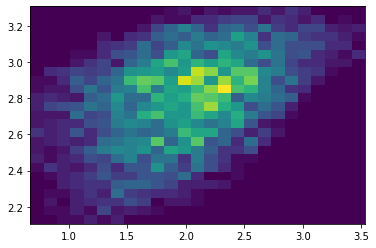

In [10]:
test = glash(np.random.uniform(0,1,(4000,5)))
x_test = tf.reshape(test[:, :1], (4000,))
y_test = tf.reshape(test[:, 1:2], (4000,))

plt.hist2d(x_test, y_test, bins=25)

(array([ 23.,  30.,  31.,  62.,  92., 102., 131., 174., 191., 202., 242.,
        231., 248., 262., 284., 247., 260., 220., 201., 207., 140., 118.,
         99.,  69.,  51.,  36.,  19.,  13.,  11.,   4.]),
 array([0.6706137, 0.7660105, 0.8614073, 0.9568041, 1.0522009, 1.1475977,
        1.2429944, 1.3383912, 1.4337881, 1.5291848, 1.6245816, 1.7199785,
        1.8153752, 1.910772 , 2.0061688, 2.1015656, 2.1969624, 2.292359 ,
        2.3877559, 2.4831526, 2.5785496, 2.6739464, 2.7693431, 2.86474  ,
        2.9601367, 3.0555334, 3.1509302, 3.2463272, 3.341724 , 3.4371207,
        3.5325174], dtype=float32),
 <BarContainer object of 30 artists>)

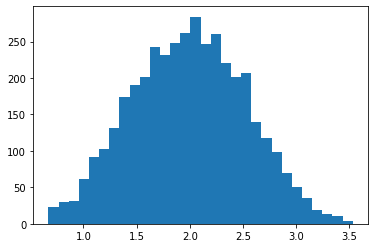

In [11]:
a = x_test.numpy()
plt.hist(a, bins=30)

(array([  5.,  16.,  22.,  36.,  44.,  69.,  61.,  88.,  90., 125., 142.,
        161., 159., 154., 208., 217., 217., 233., 256., 293., 261., 223.,
        196., 172., 155., 157., 115.,  74.,  33.,  18.]),
 array([2.1055305, 2.145615 , 2.1856997, 2.2257843, 2.265869 , 2.3059535,
        2.346038 , 2.3861227, 2.4262073, 2.466292 , 2.5063765, 2.546461 ,
        2.5865457, 2.6266303, 2.666715 , 2.7067995, 2.746884 , 2.7869687,
        2.8270533, 2.867138 , 2.9072225, 2.947307 , 2.9873917, 3.0274763,
        3.067561 , 3.1076455, 3.14773  , 3.1878147, 3.2278993, 3.267984 ,
        3.3080685], dtype=float32),
 <BarContainer object of 30 artists>)

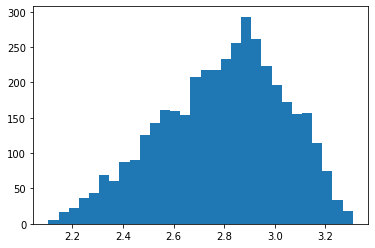

In [12]:
b = y_test.numpy()
plt.hist(b, bins=30)

In [13]:
stats_gen_x = stats_dist(a, prnt=False)
stats_gen_y = stats_dist(b, prnt=False)

stats_or_x = stats_dist(x[:, :1].reshape(4000,), prnt=False)
stats_or_y = stats_dist(x[:, 1:2].reshape(4000,), prnt=False)

In [14]:
stats_df = df_generator(stats_or_x,
                        stats_gen_x,
                        stats_or_y,
                        stats_gen_y,
                        np.array(["Mean:", "Standard Deviation:",
                                  " Variance:", "Covariance:"]),
                        df_style)

stats_df

,,original_x_dim,generated_x_dim,original_y_dim,generated_y_dim
0,Mean:,0.999292,1.992735,1.000246,2.793783
1,Standard Deviation:,1.003834,0.533891,1.004512,0.243217
2,Variance:,1.007683,0.285039,1.009045,0.059154
3,Covariance:,1.007935,0.285111,1.009297,0.059169


In [16]:
# OpenCV function that compares 2 histograms, here specifically using the chi_square method to compute the distance
cv2.compareHist(x[:, :1].reshape(4000,), a, cv2.HISTCMP_CHISQR)

17471.990157899007